In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv("LoanApprovalPrediction.csv")





In [2]:
# Initial overview
print("First 5 rows:\n", data.head())
print("\nData Types:\n", data.dtypes)

# Drop Loan_ID
data.drop(columns=['Loan_ID'], inplace=True)



First 5 rows:
     Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  

In [3]:
# Show categorical variable count before encoding
cat_cols = data.select_dtypes(include='object').columns
print(f"Categorical variables before encoding: {len(cat_cols)}")



Categorical variables before encoding: 6


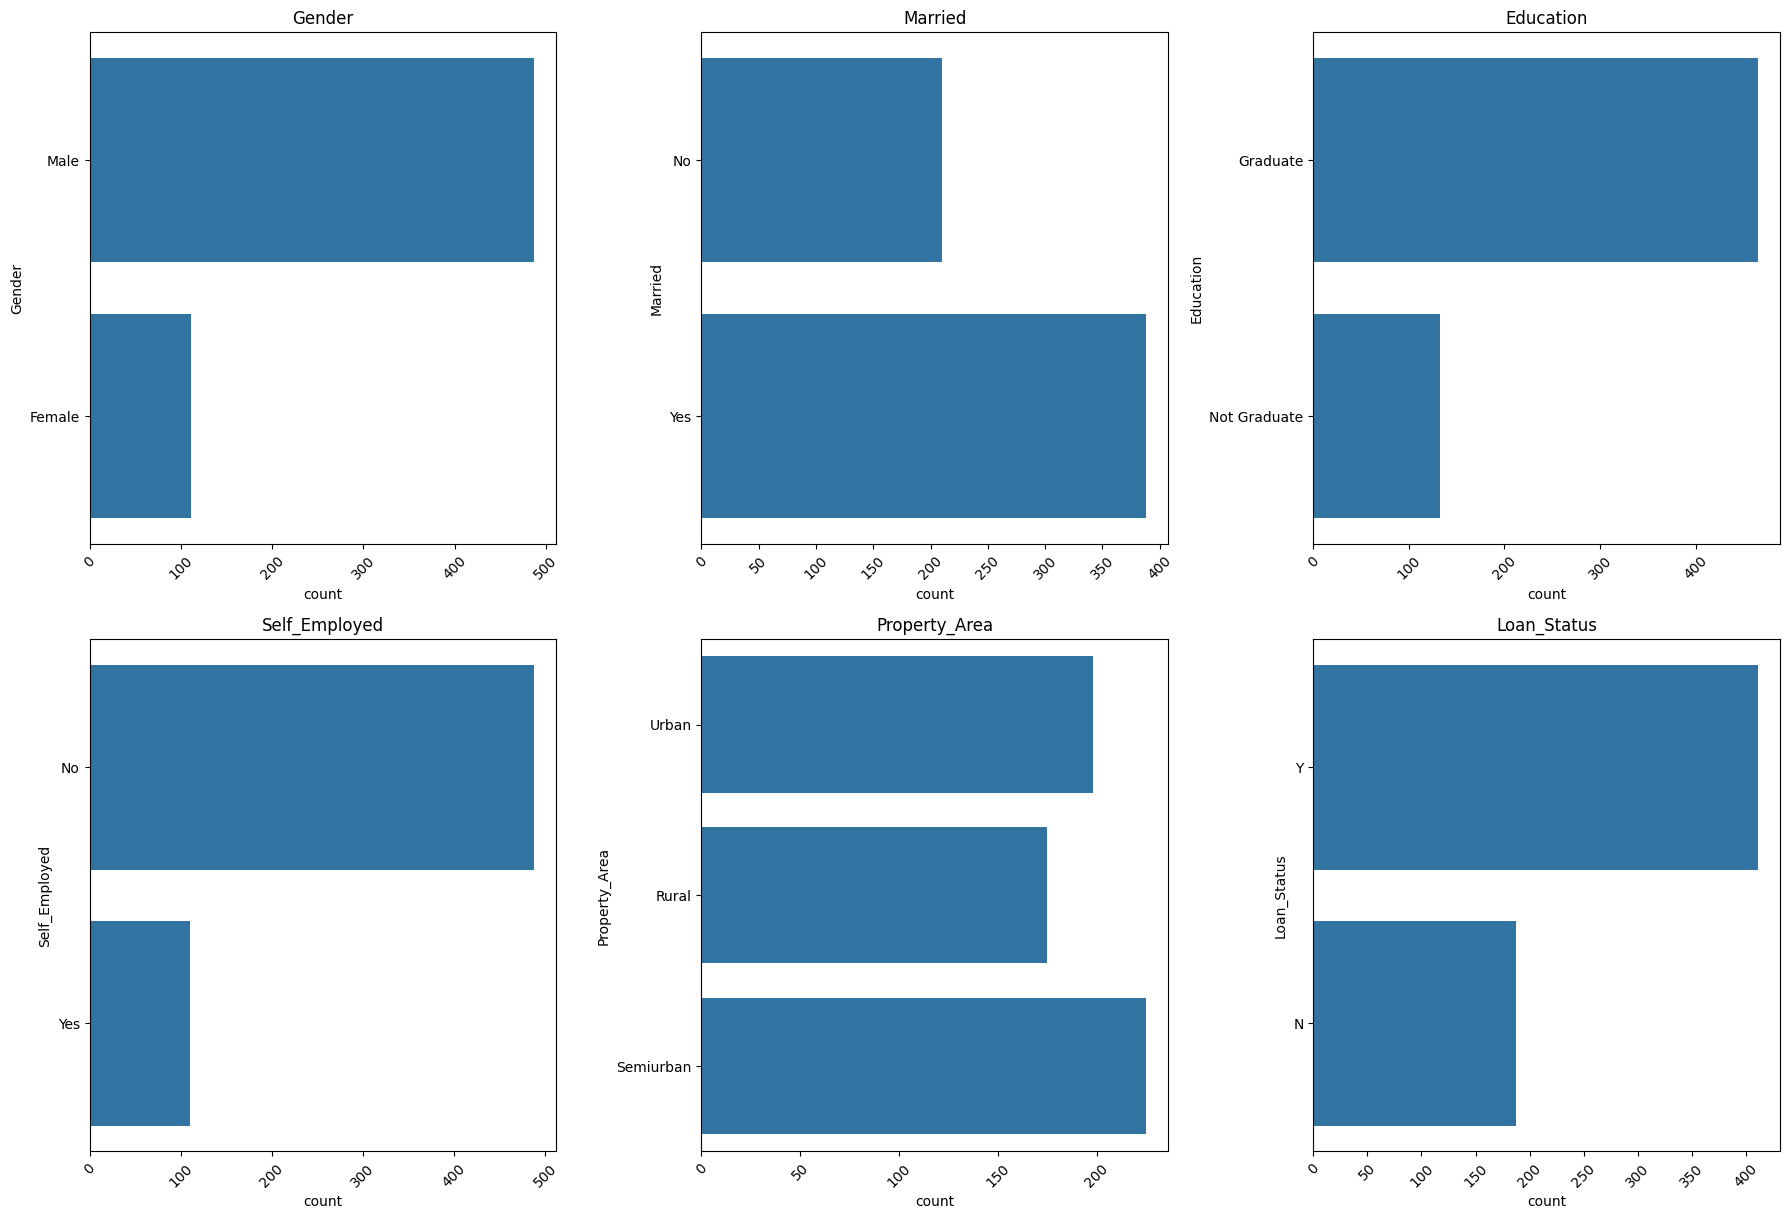

In [4]:
# Visualize categorical distributions
plt.figure(figsize=(18, 36))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data[col])
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [5]:
# Label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Null value check
print("\nMissing values before filling:\n", data.isnull().sum())




Missing values before filling:
 Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


In [6]:
# Fill missing values with mean (simple approach)
data.fillna(data.mean(numeric_only=True), inplace=True)

# Double-check missing values
print("\nMissing values after filling:\n", data.isnull().sum())




Missing values after filling:
 Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


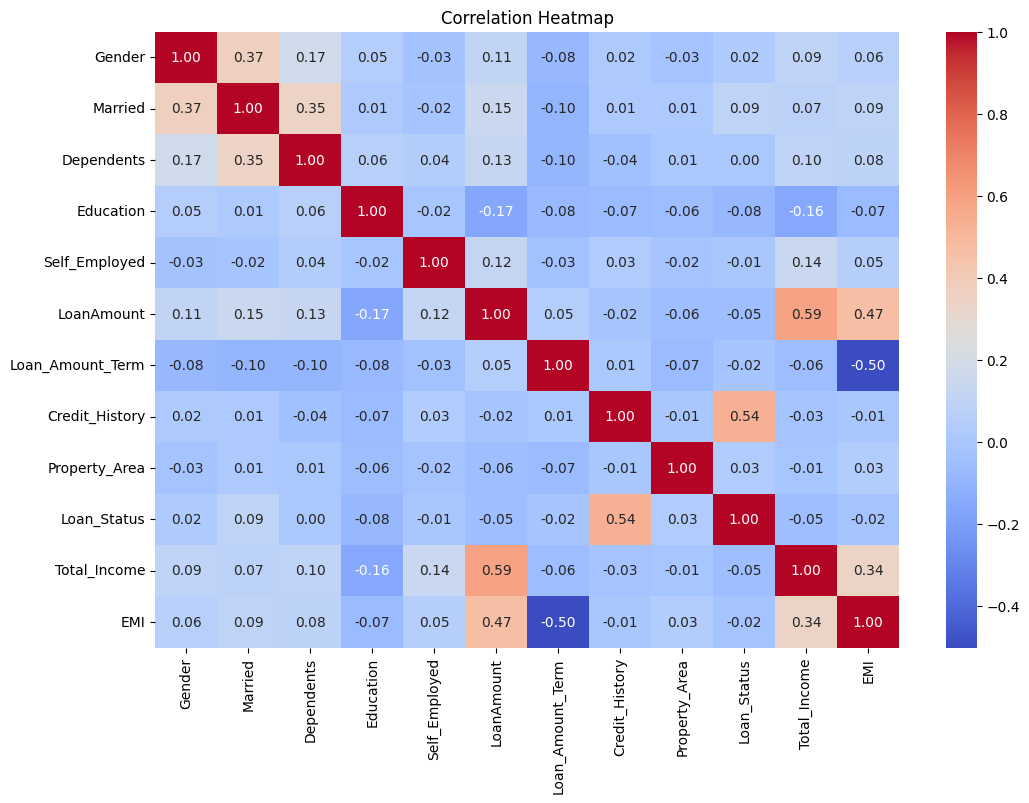

In [7]:
# Feature Engineering: Add Total_Income & EMI
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['EMI'] = data['LoanAmount'] / data['Loan_Amount_Term']

# Drop original income features if needed
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [8]:
# Define input and target
X = data.drop('Loan_Status', axis=1)
Y = data['Loan_Status']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Define classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}




=== KNN ===
Accuracy: 66.11%
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.18      0.25        56
           1       0.70      0.88      0.78       124

    accuracy                           0.66       180
   macro avg       0.55      0.53      0.51       180
weighted avg       0.61      0.66      0.62       180



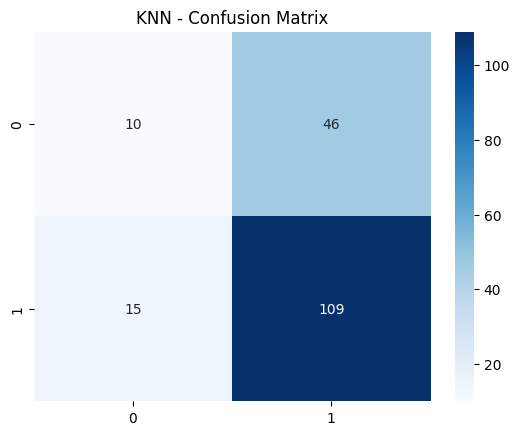

Cross-Validation Score: 61.36%

=== Random Forest ===
Accuracy: 78.33%
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.46      0.57        56
           1       0.79      0.93      0.86       124

    accuracy                           0.78       180
   macro avg       0.77      0.70      0.71       180
weighted avg       0.78      0.78      0.77       180



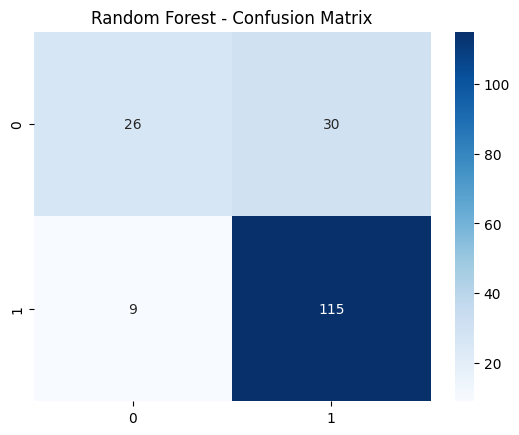

Cross-Validation Score: 76.60%

=== SVC ===
Accuracy: 68.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.69      1.00      0.82       124

    accuracy                           0.69       180
   macro avg       0.34      0.50      0.41       180
weighted avg       0.47      0.69      0.56       180



C:\Users\uvass\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uvass\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\uvass\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

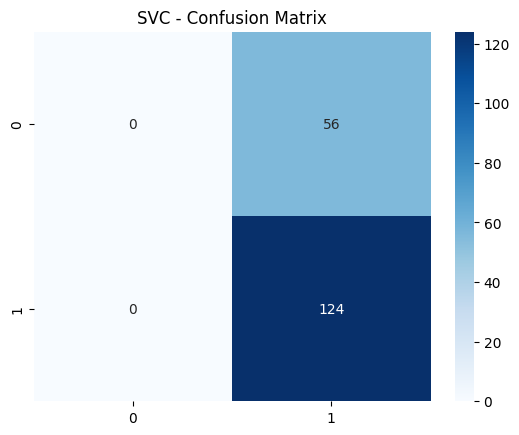

Cross-Validation Score: 68.06%


C:\Users\uvass\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
Accuracy: 79.44%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.39      0.54        56
           1       0.78      0.98      0.87       124

    accuracy                           0.79       180
   macro avg       0.83      0.68      0.71       180
weighted avg       0.81      0.79      0.77       180



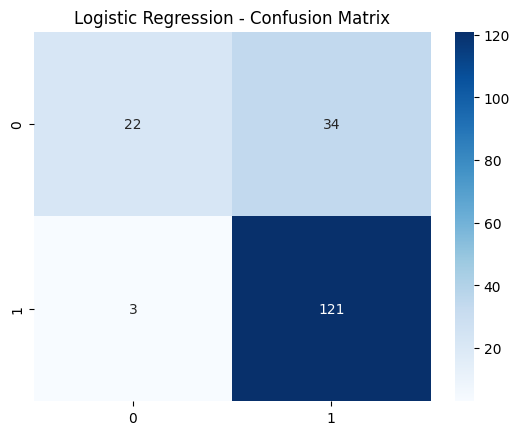

C:\Users\uvass\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\uvass\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

Cross-Validation Score: 80.28%


C:\Users\uvass\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Train and evaluate on test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

for name, model in classifiers.items():
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {accuracy_score(Y_test, pred) * 100:.2f}%")
    print("Classification Report:\n", classification_report(Y_test, pred))
    sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    cv_score = cross_val_score(model, X, Y, cv=5)
    print(f"Cross-Validation Score: {cv_score.mean() * 100:.2f}%")